# Unsupervised Learning
- "Unsupervised learning in artificial intelligence is a type of machine learning that learns from data without human supervision. Unlike supervised learning, unsupervised machine learning models are given unlabeled data and allowed to discover patterns and insights without any explicit guidance or instruction." (https://cloud.google.com/discover/what-is-unsupervised-learning)
- There are mainly two tasks for unsupervised learning, 'clustering' and 'dimensionality reduction'.
- Here, let's use Reddit data again for understanding unsupervised learning.


In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
url = 'https://raw.githubusercontent.com/EunCheolChoi0123/COMM557Tutorial/refs/heads/main/Tutorial%2010%20Supervised%20Learning%20(2)/task.json'
post_df = pd.read_json(url)
post_df.head()

,author,author_fullname,author_flair_text,author_premium,distinguished,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,created_utc,...,sadness,surprise,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,high_score,log_score
0,Puzzleheaded_Yam6724,t2_rlq1t99q,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78695,public,1704068108,...,0.731158,0.006934,0.009208,0.000128,0.000599,0.000192,0.000523,0.000323,0,0.0
1,umbillionthhuman,t2_t1lv4ggx,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78697,public,1704071402,...,0.104113,0.014641,0.126472,0.001246,0.113598,0.000785,0.010245,0.001256,0,0.0
2,OkProcedure4578,t2_a73ota22,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78700,public,1704077400,...,0.005774,0.005751,0.014552,0.000139,0.000821,0.000262,0.000627,0.000296,0,0.0
3,Sea_Pomegranate1122,t2_afhya3dcb,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78702,public,1704080850,...,0.005696,0.039513,0.003418,0.000111,0.000402,0.000165,0.000290,0.000174,0,0.0
4,Glittering-Smoke-498,t2_kthis6gcr,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78704,public,1704083495,...,0.293395,0.026760,0.032538,0.000294,0.005105,0.000312,0.002128,0.000542,0,0.0


In [98]:
author_column = ['author_premium', 'over_18']
comment_column = ['n_comments', 'tree_depth', 'tree_width']
emotion_column = ['joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise']
toxicity_column = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']
regression_column = ['log_score']

df = post_df[author_column + comment_column + emotion_column + toxicity_column + regression_column]

In [99]:
df.describe()

,author_premium,over_18,n_comments,tree_depth,tree_width,joy,anger,fear,sadness,disgust,surprise,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,log_score
count,996.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.006024,0.003000,6.209000,2.001000,3.543000,0.059670,0.076046,0.080208,0.200902,0.099199,0.087938,0.065241,0.001371,0.043069,0.000792,0.007072,0.000618,0.637782
std,0.077420,0.054717,9.155061,2.067674,4.603188,0.166423,0.166578,0.176403,0.291618,0.193187,0.147078,0.172028,0.012323,0.155924,0.005972,0.036878,0.001741,0.545848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000289,0.000596,0.000241,0.001054,0.000317,0.000478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.002847,0.008609,0.004889,0.014058,0.007193,0.010443,0.001610,0.000106,0.000216,0.000120,0.000209,0.000160,0.000000
50%,0.000000,0.000000,3.000000,1.000000,2.000000,0.006081,0.017076,0.013755,0.048553,0.022285,0.032258,0.006581,0.000119,0.000522,0.000159,0.000401,0.000220,0.602060
75%,0.000000,0.000000,7.000000,3.000000,4.000000,0.019615,0.044929,0.057567,0.272909,0.074990,0.085113,0.028420,0.000186,0.001683,0.000319,0.001116,0.000416,1.000000
max,1.000000,1.000000,71.000000,29.000000,54.000000,0.991900,0.987772,0.991445,0.993207,0.985681,0.939004,0.995224,0.356856,0.978909,0.137096,0.562472,0.038714,2.744293


In [100]:
df['author_premium'] = df['author_premium'].fillna(0)

/tmp/ipython-input-2952977147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['author_premium'] = df['author_premium'].fillna(0)


In [101]:
import numpy as np

# Columns to be log-transformed
cols_to_be_scaled = ['n_comments','tree_depth','tree_width']
df[cols_to_be_scaled] = df[cols_to_be_scaled].astype(float)

df.loc[:, cols_to_be_scaled] = np.log10(df[cols_to_be_scaled] + 1)

/tmp/ipython-input-1856433390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_be_scaled] = df[cols_to_be_scaled].astype(float)


In [136]:
# Standardize the features
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
- Group n observations into k clusters
- https://www3.cs.stonybrook.edu/~has/CSE545/Slides-2016/8.11_6.pdf

### K-means clustering
- "K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster." (https://www.geeksforgeeks.org/k-means-clustering-introduction/)
- Requires hyperparameter 'k', or the number of clusters we want to figure out.
- We can either (i) rely on our theoretical assumptions, (ii) try out different k's and find out, or (iii) find optimal k based on Elbow Method and/or Silhouette Score.

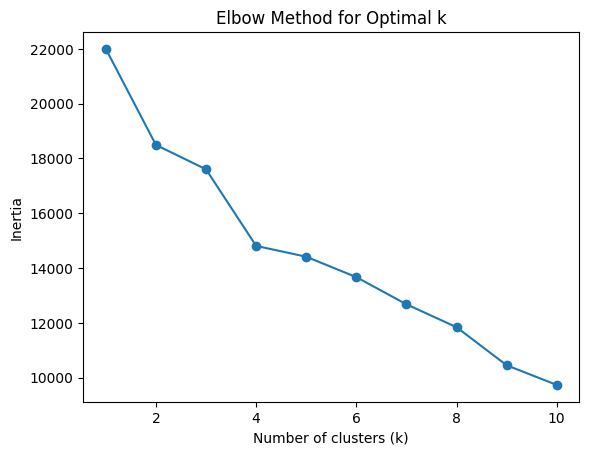

In [137]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding optimal k using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


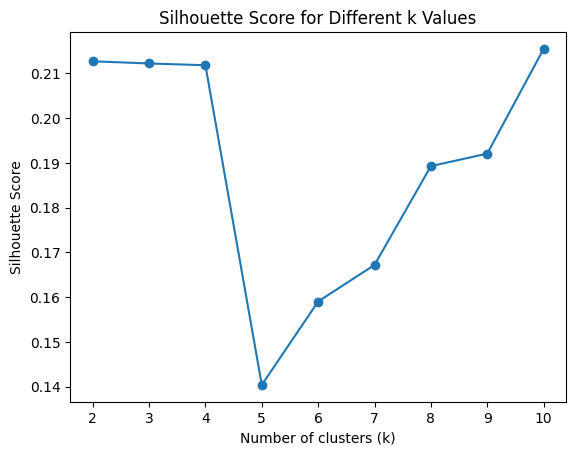

In [138]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()


In [139]:
# Fit KMeans with optimal k (e.g., k=3) and visualize clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [140]:
df['kmeans'] = clusters
df.value_counts('kmeans')

/tmp/ipython-input-3315938552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmeans'] = clusters


,count
kmeans,
1,416
2,404
0,180


### Hierarchical Clustering (agglomerative)
- Bottom-up: A pair of nearby datapoints/clusters are aggregated until every datapoint belongs to a single cluster.
- Reveals the hierarchical structure of the data.
- A cutoff point is used to determine which clusters to leverage for the analysis.

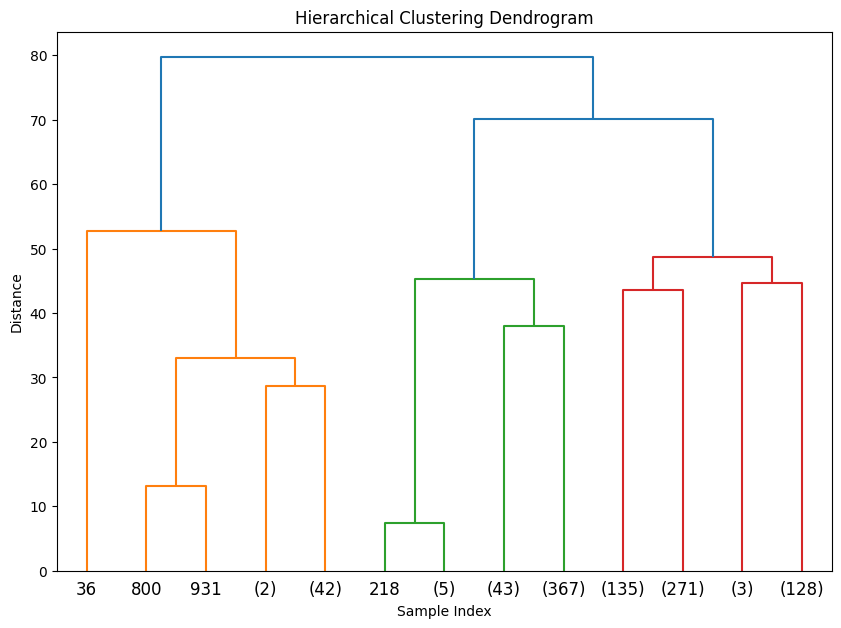

In [141]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage for hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [142]:
from scipy.cluster.hierarchy import fcluster

# Define a distance cutoff for clusters
distance_cutoff = 60  # Adjust this value as needed

# Use fcluster to extract clusters based on the distance cutoff
clusters = fcluster(linkage_matrix, distance_cutoff, criterion='distance')

# Print or analyze the clusters
print(clusters)

# Example: Add cluster assignments to the original DataFrame
df['hca'] = clusters

# Now you can analyze data points within each cluster
df.value_counts('hca')

[3 3 3 3 2 2 2 3 2 3 2 3 3 2 2 3 3 3 2 2 2 2 3 2 2 3 3 2 3 2 2 2 2 3 2 3 1
 2 1 2 2 2 2 2 1 3 2 3 3 2 2 3 3 2 3 3 3 2 2 2 3 3 2 3 2 2 3 3 2 3 3 1 3 2
 2 2 3 3 2 3 2 2 3 1 1 3 2 3 2 3 2 2 3 3 2 2 3 3 3 3 2 3 2 3 2 2 3 3 2 3 2
 3 2 3 2 3 3 3 2 3 3 3 1 3 3 3 3 3 2 2 3 3 1 3 3 2 3 2 2 3 3 3 3 2 3 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 2 2 3 2 2 2 3 2 2 3 3 2 3 3 3 3 2 3 2 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 3 2 3 2 3 2 3 2 2 2 3 3 3 2 3 3 3 2 3 1 3
 2 2 3 2 3 3 2 3 3 3 3 3 3 3 2 3 3 2 3 2 3 3 3 1 3 3 2 2 2 3 3 2 3 2 3 3 3
 3 3 2 2 2 3 3 2 3 2 2 2 2 2 2 2 2 3 2 3 2 2 2 3 3 2 2 3 3 2 3 3 2 2 3 2 2
 2 2 3 2 2 2 3 3 2 2 2 2 3 2 2 1 2 3 2 2 3 3 2 3 2 3 2 3 3 2 3 3 3 1 2 2 2
 3 2 3 3 3 2 3 2 3 2 2 1 2 2 3 3 2 3 3 3 2 2 3 2 3 3 2 3 3 3 3 2 2 1 3 2 3
 2 3 2 3 2 2 2 3 2 2 2 2 3 2 2 2 3 3 2 3 3 2 2 2 3 2 3 2 2 3 2 2 3 2 3 3 3
 3 3 2 3 2 2 3 3 2 2 2 2 3 3 2 3 2 3 2 1 3 2 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3
 2 3 1 1 3 3 2 3 2 3 3 3 3 3 3 3 2 3 3 2 2 3 3 3 3 2 2 2 2 3 3 3 3 3 3 2 2
 3 2 3 3 2 3 2 3 2 3 2 3 

/tmp/ipython-input-813551286.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hca'] = clusters


,count
hca,
3,537
2,416
1,47


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- "(i) DBSCAN does not require a pre-determined set number of clusters (ii) DBSCAN identifies outliers as noise, instead of classifying them into a cluster. (iii) DBSCAN is more flexible when it comes to the size and shape of clusters than other partitioning methods, such as K-means." (https://medium.com/@tarammullin/dbscan-2788cfce9389)
- Two hyperparameters: Epsilon (eps) and Minimum Samples (min_samples)
- Usually Minimum Samples are recommended to be set around 1 to 2 times the dimensionality (number of features used)
- After deciding min_sample, use the k-NN distance plot to find an optimal eps.

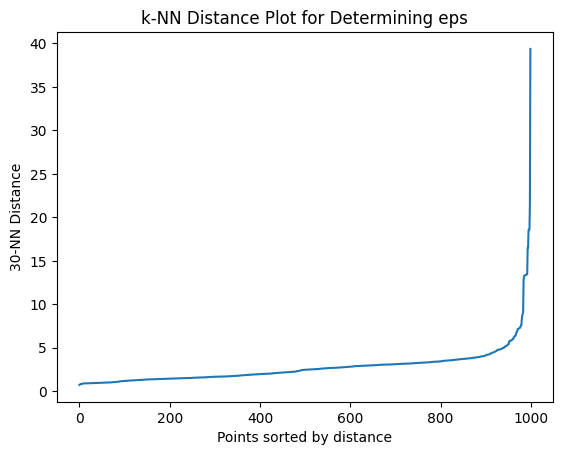

In [143]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Using your scaled data from earlier (X_scaled)
k = 30  # or choose k slightly above the dimensionality of your data
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances to the nth nearest neighbor and plot
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-NN Distance')
plt.title('k-NN Distance Plot for Determining eps')
plt.show()


In [144]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=30)
db_clusters = dbscan.fit_predict(X_scaled)


In [145]:
df['dbscan'] = db_clusters
df.value_counts('dbscan')

/tmp/ipython-input-2698642963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dbscan'] = db_clusters


,count
dbscan,
-1,579
0,207
2,135
1,79


### Gaussian Mixture Model Clustering
- "A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians."
- https://scikit-learn.org/1.5/modules/mixture.html
- https://builtin.com/articles/gaussian-mixture-model#:~:text=A%20Gaussian%20mixture%20model%20is%20a%20soft%20clustering%20technique%20used,clusters%20in%20a%20data%20set.

In [146]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

In [147]:
df['gmm'] = gmm_clusters
df.value_counts('gmm')

/tmp/ipython-input-2016737062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gmm'] = gmm_clusters


,count
gmm,
1,480
2,324
0,196


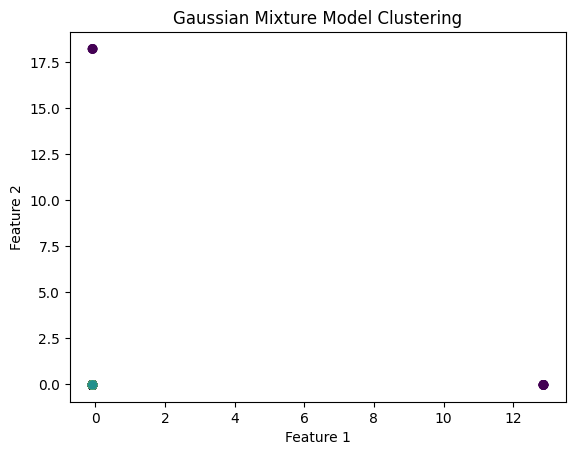

In [148]:

# Scatter plot for GMM clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_clusters, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Dimensionality Reduction
- Assign m features to p components with some weight or probability.
- https://www3.cs.stonybrook.edu/~has/CSE545/Slides-2016/8.11_6.pdf

### Principal Component Analysis
- **Linear** dimentionality reduction method
- It finds the directions (principal components) that maximize the variance in the data.
- For finding the optimal number of PCs, we use either Scree Plot which describes explained variance by each feature, or Cumulative Explained Variance
- StatQuest: https://www.youtube.com/watch?v=FgakZw6K1QQ

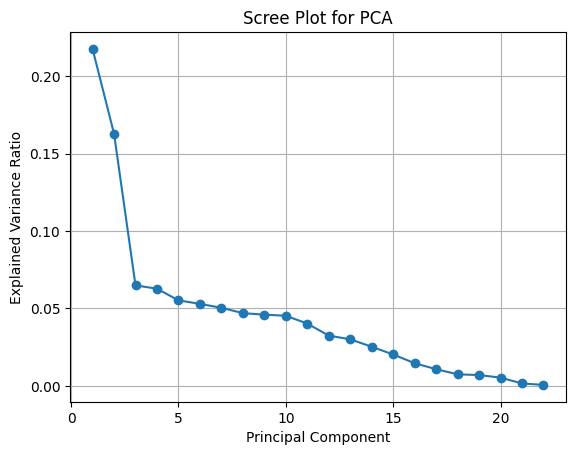

In [149]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA on the scaled data without specifying components
pca = PCA()
pca.fit(X_scaled)

# Get the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()


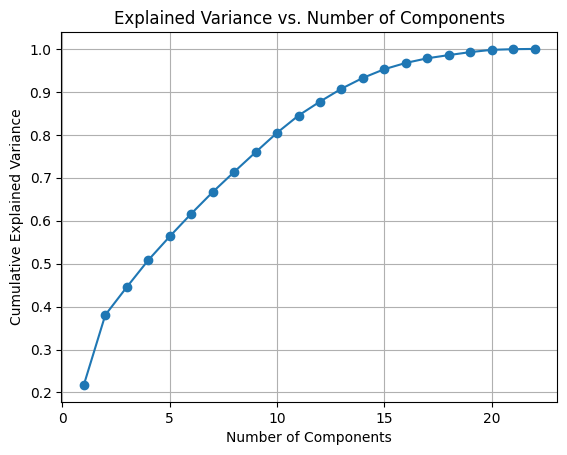

In [150]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to the scaled data
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [151]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

                      PC1       PC2       PC3
author_premium  -0.024101 -0.077382  0.001381
over_18          0.001399 -0.022645  0.131312
n_comments       0.654666  0.691449  0.032542
tree_depth       0.577710  0.608048  0.053388
tree_width       0.620497  0.672951  0.043629
joy              0.079384  0.119899 -0.252100
anger           -0.096406  0.138608  0.493544
fear            -0.020054 -0.110282  0.212927
sadness         -0.129919 -0.001034  0.179810
disgust         -0.042454  0.037584  0.474601
surprise         0.046766  0.020395 -0.388225
toxicity        -0.685867  0.581861  0.161420
severe_toxicity -0.533858  0.479433 -0.366003
obscene         -0.675805  0.569935  0.137850
threat          -0.435260  0.370213 -0.426608
insult          -0.638742  0.574765 -0.114453
identity_attack -0.507932  0.502894  0.060453
log_score        0.367558  0.521542  0.122518
kmeans           0.682342  0.572881 -0.052661
hca              0.774637  0.074426  0.047048
dbscan           0.233775 -0.10671

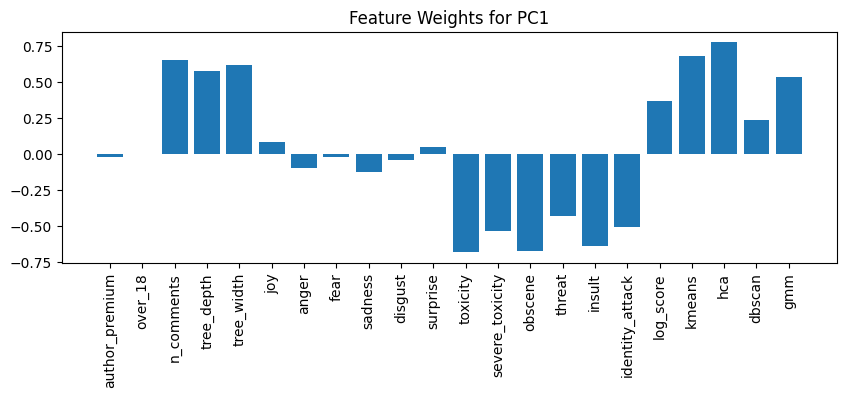

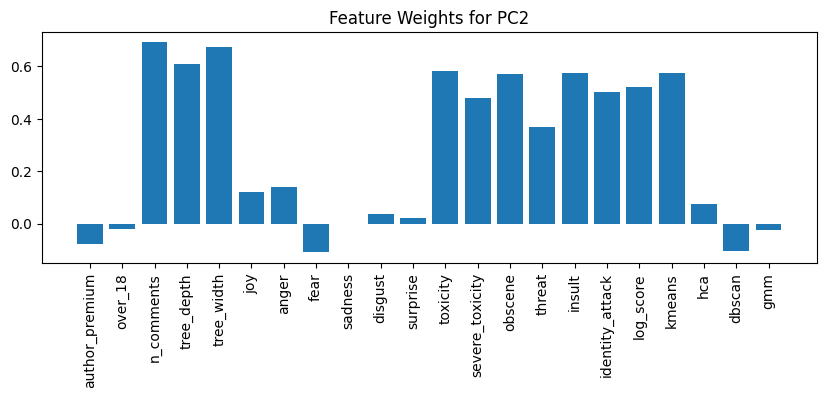

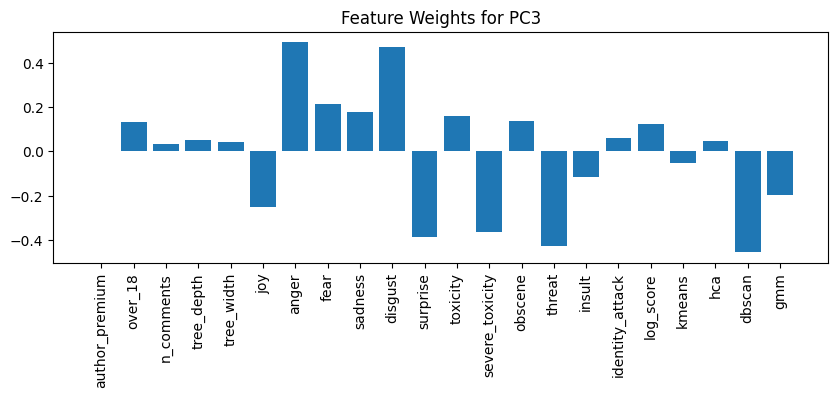

In [152]:

# Get feature weights (loadings) for each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

print(loadings_df)

for i in range(1, 4):
    plt.figure(figsize=(10,3))
    plt.bar(loadings_df.index, loadings_df[f'PC{i}'])
    plt.xticks(rotation=90)
    plt.title(f"Feature Weights for PC{i}")
    plt.show()

/tmp/ipython-input-2897015864.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], cmap='viridis') # Create the scatter plot


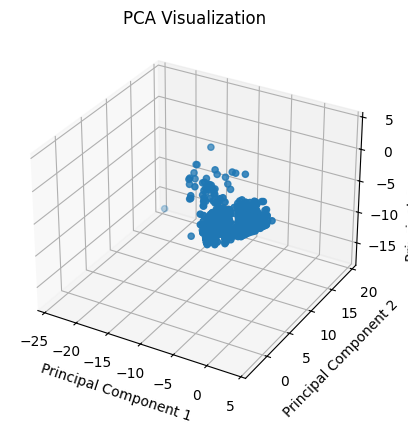

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Scatter plot after PCA
fig = plt.figure()  # Create a figure
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], cmap='viridis') # Create the scatter plot
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')  # Use set_zlabel for 3D subplot
plt.show()

# Dimensionality Reduction for Visualization of Clusters
- If your data is high-dimensional (= has many features), it is just impossible for you to visualize your clustering results without running any type of dimensionality reduction methods.
- If we have only a few dimensions to deal with, PCA might be enough, and we can use PC1 as x-axis, PC2 as y-axis, and possibly PC3 as z-axis.
- However, as PCA is a linear method, it may not capture the complex nature of high-dimensional data.
- Here, we compare PCA, t-SNE, and autoencoder methods for visualization purpose.

### PCA

In [154]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### t-SNE
- "t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data."
- "Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line."
- "t-SNE is a nonlinear technique that focuses on preserving the pairwise similarities between data points in a lower-dimensional space."
- https://www.datacamp.com/tutorial/introduction-t-sne

In [155]:
!pip install openTSNE

In [156]:
import openTSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# (Optional) Apply PCA to reduce dimensionality before t-SNE for faster performance
# pca = PCA(n_components=10, random_state=42)  # Adjust the number as needed
# X_pca = pca.fit_transform(X_scaled)

# Initialize and run openTSNE
tsne = openTSNE.TSNE(
    n_components=2,  # 2D visualization
    perplexity=30,   # Similar to scikit-learn, adjust based on dataset size
    learning_rate=200,  # Can be adjusted if needed
    n_jobs=-1,  # Use all available cores for computation
    random_state=42
)

X_tsne = tsne.fit(X_scaled)
# X_tsne = tsne.fit(X_pca)

### Autoencoder
- "In simple words, autoencoders are specific type of deep learning architecture used for learning representation of data, typically for the purpose of dimensionality reduction. This is achieved by designing deep learning architecture that aims that copying input layer at its output layer."
- https://socr.umich.edu/HTML5/ABIDE_Autoencoder/

In [157]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert data to PyTorch tensors and move to device
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)

# Define the Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Parameters
input_dim = X_tensor.shape[1]  # Number of features
latent_dim = 2  # Dimension of the latent space for visualization
model = Autoencoder(input_dim, latent_dim).to(device)  # Move model to device

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Autoencoder
num_epochs = 30
batch_size = 32
num_samples = X_tensor.shape[0]

for epoch in range(num_epochs):
    model.train()
    for i in range(0, num_samples, batch_size):
        batch = X_tensor[i:i + batch_size].to(device)  # Move each batch to device

        # Forward pass
        encoded, decoded = model(batch)
        loss = criterion(decoded, batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extracting the latent representations
model.eval()
with torch.no_grad():
    latent_rep, _ = model(X_tensor)

# Convert latent representations to numpy for visualization
latent_np = latent_rep.cpu().numpy()  # Move to CPU before converting to numpy


Using device: cpu
Epoch [10/30], Loss: 0.5790
Epoch [20/30], Loss: 0.5638
Epoch [30/30], Loss: 0.5423


### Comparing Visualization Results

In [158]:
df.columns

Index(['author_premium', 'over_18', 'n_comments', 'tree_depth', 'tree_width',
       'joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise', 'toxicity',
       'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack',
       'log_score', 'kmeans', 'hca', 'dbscan', 'gmm'],
      dtype='object')

In [159]:
column_to_visualize = 'kmeans'

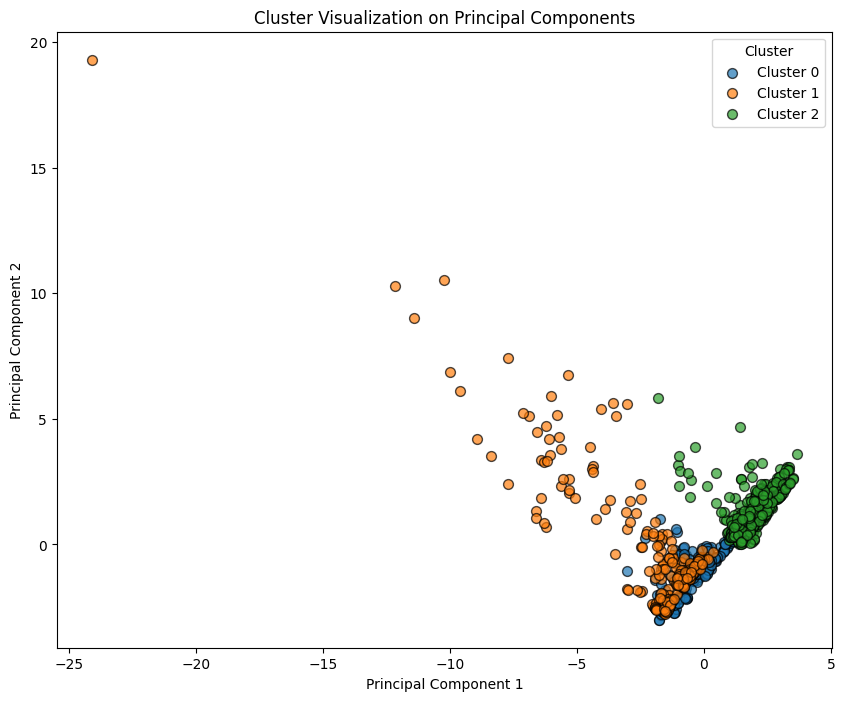

In [160]:
import matplotlib.pyplot as plt

# Unique cluster labels from the 'kmeans' column in the DataFrame
unique_clusters = sorted(df[column_to_visualize].unique())

# Create the plot
plt.figure(figsize=(10, 8))

# Plot each cluster with a unique color and label
for cluster in unique_clusters:
    cluster_data = X_pca[df[column_to_visualize] == cluster]
    plt.scatter(
        cluster_data[:, 0], cluster_data[:, 1],
        label=f'Cluster {int(cluster)}',  # Label each cluster
        alpha=0.7, s=50, edgecolor='k'
    )

# Add the legend
plt.legend(title="Cluster")
plt.title('Cluster Visualization on Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


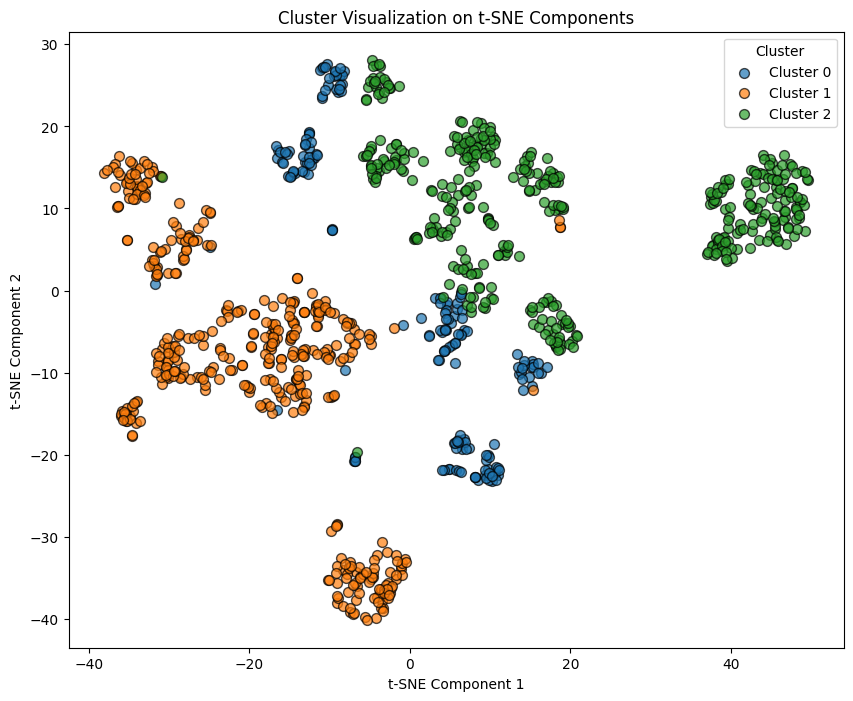

In [161]:
import matplotlib.pyplot as plt

# Unique cluster labels from the 'kmeans' column in the DataFrame
unique_clusters = sorted(df[column_to_visualize].unique())

# Create the plot
plt.figure(figsize=(10, 8))

# Plot each cluster with a unique color and label
for cluster in unique_clusters:
    cluster_data = X_tsne[df[column_to_visualize] == cluster]
    plt.scatter(
        cluster_data[:, 0], cluster_data[:, 1],
        label=f'Cluster {int(cluster)}',  # Label each cluster
        alpha=0.7, s=50, edgecolor='k'
    )

# Add the legend
plt.legend(title="Cluster")
plt.title('Cluster Visualization on t-SNE Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


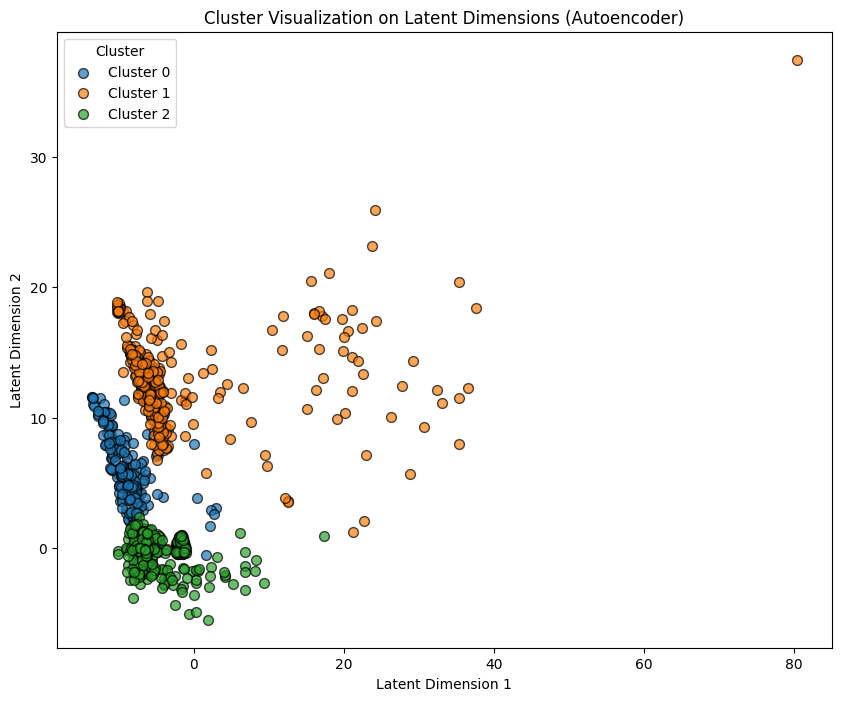

In [162]:
import matplotlib.pyplot as plt

# Unique cluster labels from the 'kmeans' column in the DataFrame
unique_clusters = sorted(df[column_to_visualize].unique())

# Create the plot
plt.figure(figsize=(10, 8))

# Plot each cluster with a unique color and label
for cluster in unique_clusters:
    cluster_data = latent_np[df[column_to_visualize] == cluster]
    plt.scatter(
        cluster_data[:, 0], cluster_data[:, 1],
        label=f'Cluster {int(cluster)}',  # Label each cluster
        alpha=0.7, s=50, edgecolor='k'
    )

# Add the legend
plt.legend(title="Cluster", loc="upper left")
plt.title('Cluster Visualization on Latent Dimensions (Autoencoder)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()
